# Packages

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data

In [219]:
train = pd.read_csv('train_ctrUa4K.csv')

In [220]:
train.head(20)
train.tail(20)
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [221]:
train.shape
test.shape
train['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

# Indexing and Subsetting

In [222]:
train['Gender']
train.loc[300:310]

train['Gender'].isnull().sum()
train.isnull().sum()



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [223]:
train[train['Gender'].isnull()]

train[(train['Gender']=='Male')&(train['Dependents']=='3+')&((train['ApplicantIncome']>10000))]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
324,LP002065,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
557,LP002795,Male,Yes,3+,Graduate,Yes,10139,0.0,260.0,360.0,1.0,Semiurban,Y


# Single Features

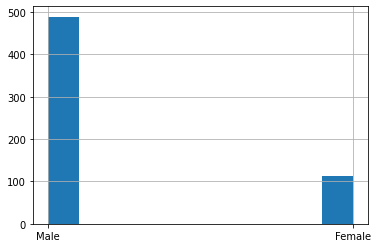

In [ ]:
pd.unique(train['Gender'])
train['Gender'].isnull().sum()
train['Gender'].value_counts()
train['Gender'].value_counts().plot(kind='bar')
train['Gender'].hist()
train['Dependents'].value_counts().plot(kind='bar')

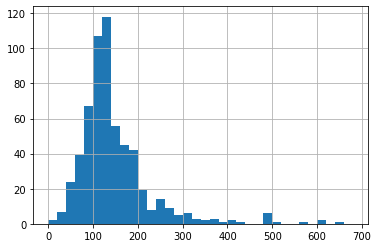

In [ ]:
train['LoanAmount'].max()
train['LoanAmount'].hist(bins=np.arange(0,700,20))

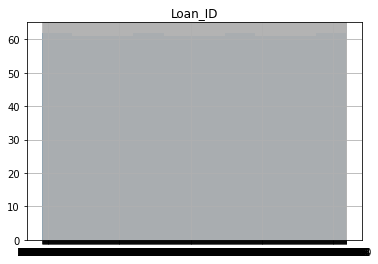

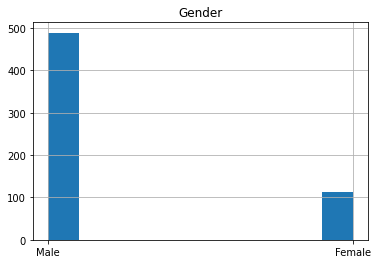

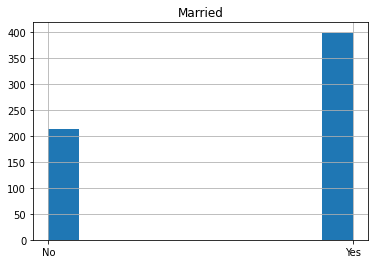

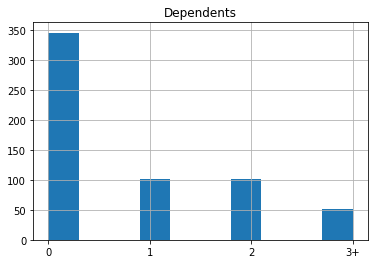

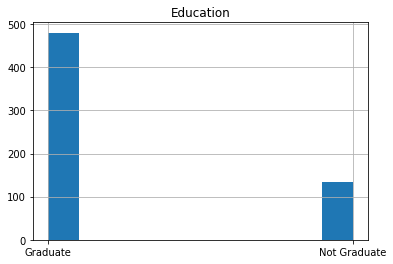

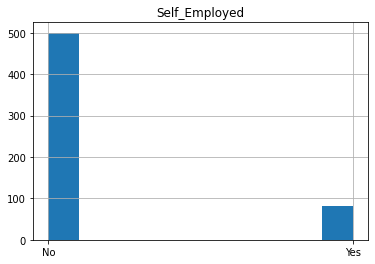

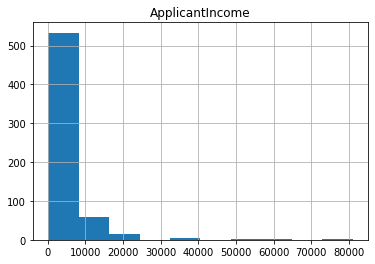

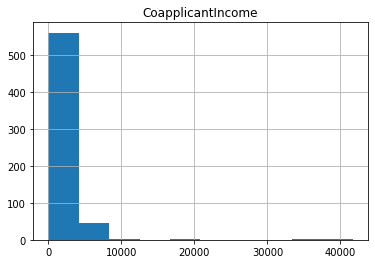

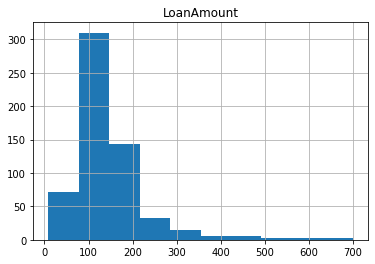

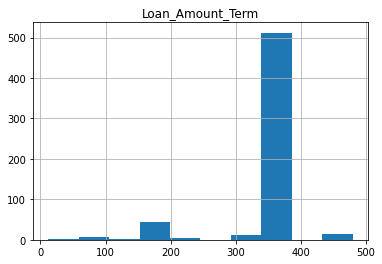

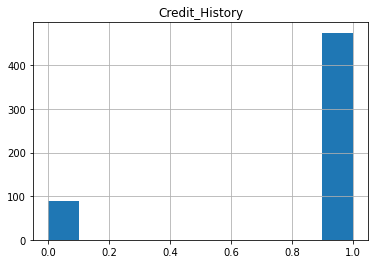

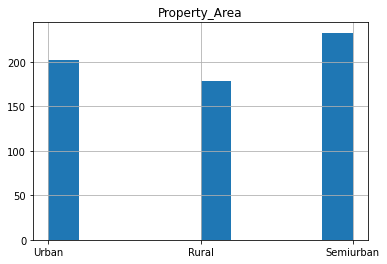

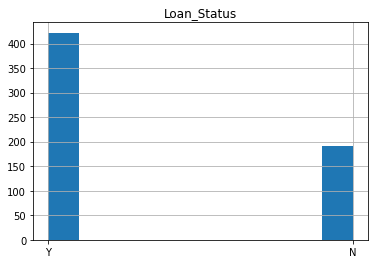

In [ ]:
for col in train.columns:
  plt.figure()
  plt.axes(title=col)
  train[col].hist()

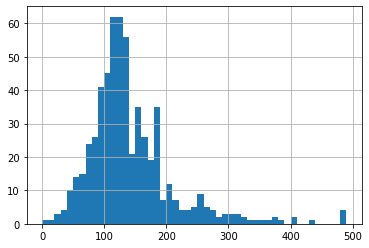

In [ ]:
train.isnull().sum()

train.hist(figsize=(20,12))

import matplotlib.pyplot as plt
for col in train.columns:
  plt.figure()
  plt.axes(title=col)
  train[col].hist()

train['LoanAmount'].hist(bins=np.arange(0,500,10))

# Pairs of Features

In [ ]:
train.columns
train.groupby('Gender')
train.groupby(['Gender']).size()
train.groupby(['Gender']).mean()
train.groupby(['Gender'])['LoanAmount'].max()



train.groupby(['Gender','Married'])
train.groupby(['Gender','Married']).size()
train.groupby(['Gender','Married']).size().plot.bar()
train.groupby(['Gender','Married']).size().unstack()
train.groupby(['Gender','Married']).size().unstack().plot.bar()
train.groupby(['Gender','Married']).mean()

ApplicantIncome  ...  Credit_History
Gender Married                   ...                
Female No           4503.787500  ...        0.821918
       Yes          4829.645161  ...        0.851852
Male   No           5236.146154  ...        0.845528
       Yes          5529.540616  ...        0.846626

[4 rows x 5 columns]

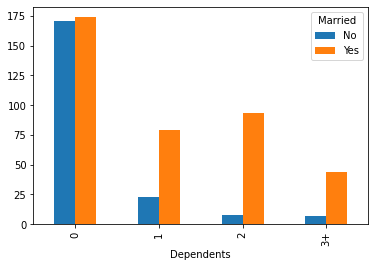

In [ ]:
train.groupby(['Gender','Dependents'])
train.groupby(['Married','Dependents']).size().unstack(level=0).plot.bar()

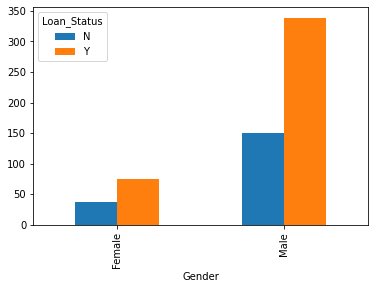

In [ ]:
train.groupby(['Gender','Loan_Status']).size().unstack().plot.bar()

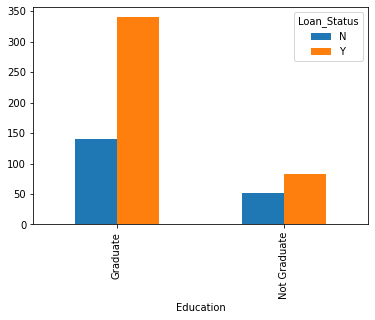

In [ ]:
train.groupby(['Education','Loan_Status']).size().unstack().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b5fb5bbd0>,
      dtype=object)

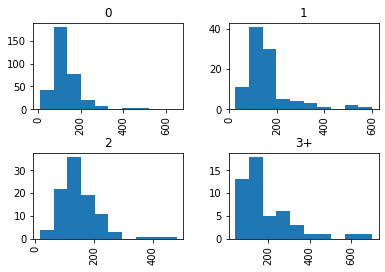

In [ ]:
train['LoanAmount'].hist(by=train['Gender'])
train['LoanAmount'].hist(by=train['Married'])
train['LoanAmount'].hist(by=train['Dependents'])

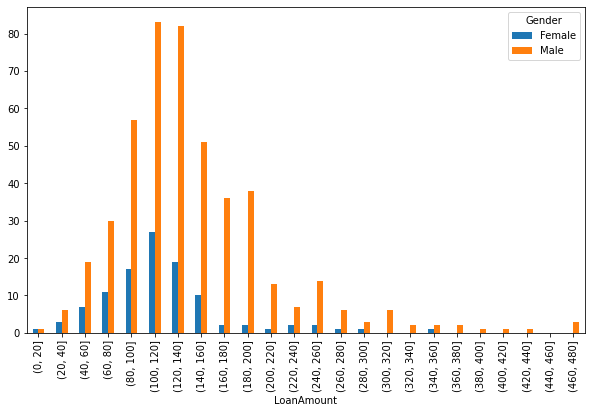

In [ ]:
bins = np.arange(0,500,20)
grouped = train.groupby(['Gender', pd.cut(train['LoanAmount'], bins)])
grouped.size().unstack(level=0).plot.bar(figsize=(10,6))

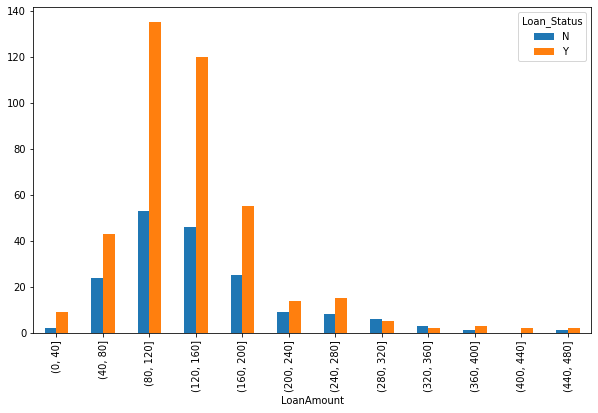

In [ ]:
bins = np.arange(0,500,40)
grouped = train.groupby(['Loan_Status', pd.cut(train['LoanAmount'], bins)])
grouped.size().unstack(level=0).plot.bar(figsize=(10,6))

(0.0, 40000.0)

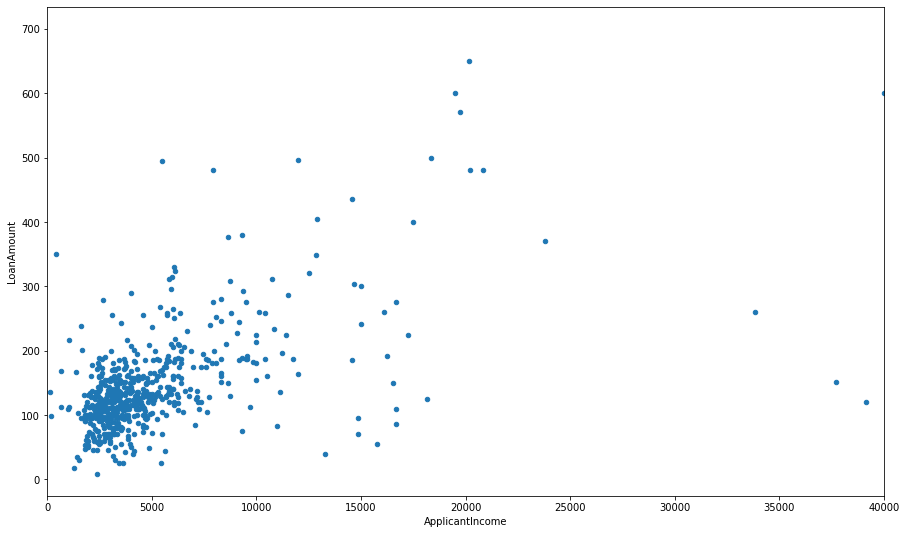

In [ ]:
#train.plot.scatter(x='ApplicantIncome',y='LoanAmount',figsize=(15,9))
ax = train.plot.scatter(x='ApplicantIncome',y='LoanAmount',figsize=(15,9))
ax.set_xlim(0,40000)

(0.0, 40000.0)

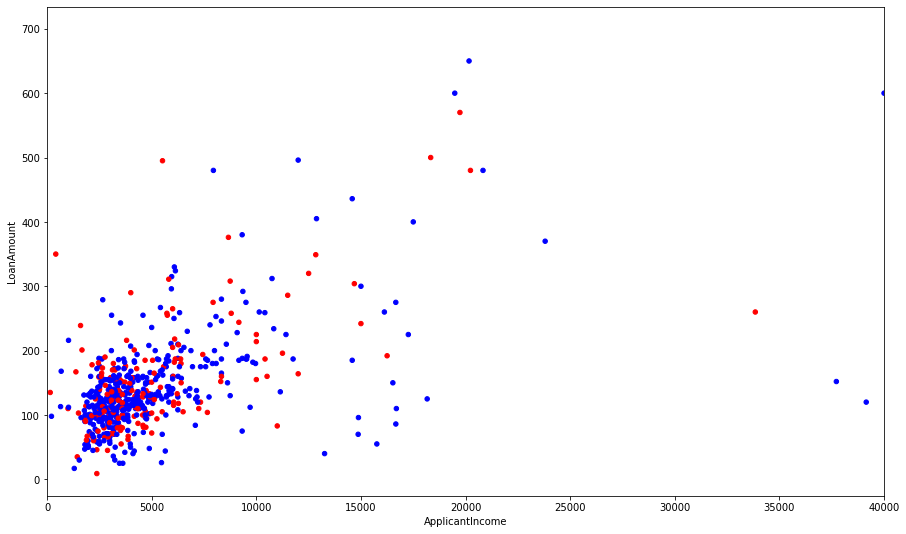

In [ ]:
color=train['Loan_Status'].replace({'Y':'blue','N':'red'})
ax = train.plot.scatter(x='ApplicantIncome',y='LoanAmount',c=color,figsize=(15,9))
ax.set_xlim(0,40000)